## Embedding Matrix

which points words into some high dimensional space:

<img src="images/words_embedding_vector.png" width="50%"  height="50%" />

Direction in this space has a semantic meaning, word with similar concepts map to the same spot

<img src="images/embedding_closest_to_E(tower).png" width="50%"  height="50%" />


A typical example the difference between man and women is very similar to difference between king and Queen 


<img src="images/man_women_king_queen.png" width="50%"  height="50%" />


Chat gpt3 has dimensionality of `12288` and has `50257` token

<img src="images/gpt3_embedding.png" width="50%"  height="50%" />

The meaning of each word can be specialized in the context, by adding more vector to it, at the begging each word get it vector from embedding matrix and has an initial meaning but in the context that vector get more specific direction:



<img src="images/context.png" width="50%"  height="50%" />


## Unembedding Matrix
The last layer, we get the last token and want a map it back to token: has one row for each word in the vocabulary, just like embedding matrix but it is swaped



<img src="images/unembedding.png" width="50%"  height="50%" />



## Softmax
It turns an arbitrary list of numbers into a valid distribution, in such a way that largest value ends up close to 1 and smaller one close to zero.


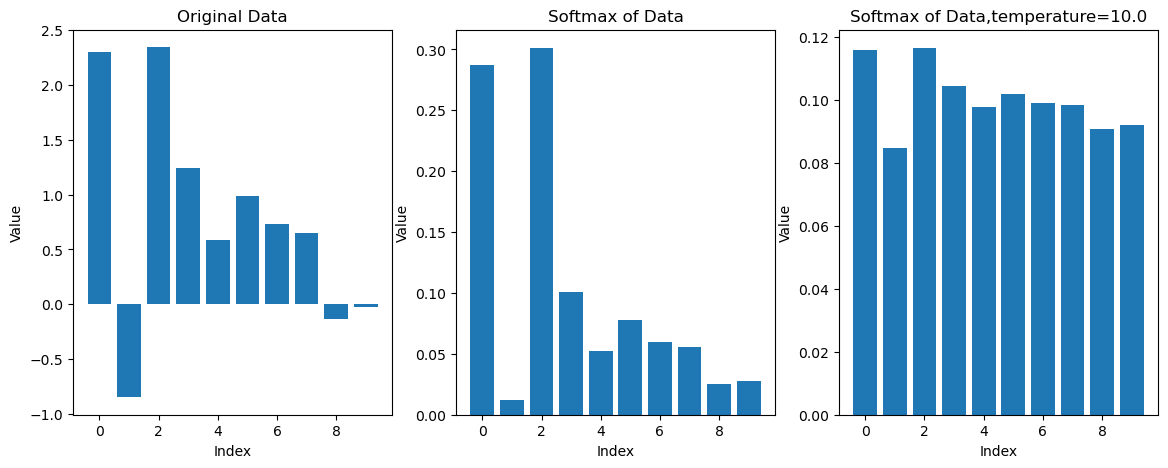

In [6]:

import numpy as np
import matplotlib.pyplot as plt


def softMax(data, temperature=1.0):
    """Calculates the softmax of a NumPy array."""
    exp_data = np.exp((1/temperature)*(data - np.max(data))
                      )  # subtracting the max for numerical stability
    sum_exp_data = np.sum(exp_data)
    softmax_result = exp_data / sum_exp_data
    return softmax_result


# To set a low and high range, you need to scale and shift the output of np.random.random()
low = -2
high = 3
data = low + (high - low) * np.random.random(size=[10, 1])

data = data.flatten()

temperature = 10.0

# creates 3 subplots next to each other
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))


ax1.bar(range(len(data)), data)
ax1.set_title('Original Data')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')

ax2.bar(range(len(data)), softMax(data))
ax2.set_title('Softmax of Data')
ax2.set_xlabel('Index')
ax2.set_ylabel('Value')


ax3.bar(range(len(data)), softMax(data, temperature))
ax3.set_title(f'Softmax of Data,temperature={temperature}')
ax3.set_xlabel('Index')
ax3.set_ylabel('Value')

plt.show()

## Dot Product
To see how much two vectors are similar (same direction)


<img src="images/dot1.png" width="50%"  height="50%" />
<img src="images/dot2.png" width="50%"  height="50%" />
<img src="images/dot3.png" width="50%"  height="50%" />






## Logit
The input to the softmax (raw normalized input).

## Transformer
The aim of the transformer is to progressively adjust these embedding so they don't code individual words, so they became much more contextual meaning

<img src="images/transformer1.png" width="50%"  height="50%" />
<img src="images/transformer2.png" width="50%"  height="50%" />
<img src="images/transformer3.png" width="50%"  height="50%" />



<img src="images/transformer4.gif"  />


For instance, at begging, the embedding value of the mole is the same in all these contexts:

<img src="images/mole_transformer.png" width="50%"  height="50%" />

So imagine the following sentence, at the beginning, the embedding encode the meaning of that particular word and its position with n context


<img src="images/transformer_blue_creature.png" width="50%"  height="50%" />

The goal is to have serious of conversation to have a new refined embedding 

<img src="images/refined_embedding.png" width="50%"  height="50%" />


### Query Vector

$ W_Q $ (query projection): $ (128, 12288) $

<img src="images/query_vector.png" width="50%"  height="50%" />




### Key Vector

It answers the query


$ W_K $ (key projection): $ (128, 12288) $


<img src="images/key_vector1.png" width="50%"  height="50%" />

<img src="images/key_vector2.png" width="50%"  height="50%" />





To measure how well a key match a query, we calculate the dot product:

<img src="images/key_dot_query.png" width="50%"  height="50%" />

### Attends to

Since the key value produced by fluffy and blue aligns with the query of creature and dot product is some positive number, in machine learning it is called the embeddings of fluffy and blue **Attends to** creature

<img src="images/attends_to.png" width="50%"  height="50%" />


### Attention Pattern

<img src="images/attention_pattern.png" width="50%"  height="50%" />



Some notation from original paper:



<img src="images/paper_1.png" width="50%"  height="50%" />


For numerical stability, we divide the denominator by the square root of dimension 


<img src="images/paper_2.png" width="50%"  height="50%" />




### Normalized Attention Pattern (Masking)

Since we don't want the later word to affect the earlier words during training (otherwise they kind of give away the answer), we set them into  $-\infty$ before applying softmax.



<img src="images/effect_the_earlier_words.png" width="50%"  height="50%" />


<img src="images/normalized_attention_pattern.png" width="50%"  height="50%" />





### Context Size
The size of the attention table is the squared root of the context size:

<img src="images/attention_table_size.png" width="50%"  height="50%" />
and can quickly become huge, some solution for scaling it up

- **Sparse Attention Mechanism**
- **Block wise Attention**
- **Linformer**
- **Ring Attention**

### Value Matrix

$ W_V $ (value projection): $ (12288, 12288) $

In our example, we have the embedding of fluffy, and we want the value to cause changes in the embedding of creature, to do this we add a value matrix and multiply by encoding of the first embedding,  the result of this is called **value Vector**

<img src="images/updating_embeddings1.png" width="50%"  height="50%" />

<img src="images/updating_embeddings2.png" width="50%"  height="50%" />


So the way we're actually doing that, is in the attention pattern, we multiply the result **key vector** by **value matrix**, and  we get a **value vector**, then for each column in the digram, we multiply the **value vector** by the softmax, and then we add all of them to  original embedding


<img src="images/complete_update_embedding.png" width="50%"  height="50%" />

### Multi head Attention
The following operation is a single head attention:  
<img src="images/head_of_attention.png" width="50%"  height="50%" />

The full attention block in the transformer, you have several layers of attention each with its own key, query and value 

<img src="images/multi_head_attention1.png" width="50%"  height="50%" />
<img src="images/multi_head_attention2.png" width="50%"  height="50%" />
<img src="images/multi_head_attention3.png" width="50%"  height="50%" />
<img src="images/multi_head_attention4.png" width="50%"  height="50%" />
<img src="images/multi_head_attention5.png" width="50%"  height="50%" />
<img src="images/multi_head_attention6.png" width="50%"  height="50%" />
<img src="images/multi_head_attention7.png" width="50%"  height="50%" />





### Mapping of Value Matrix of two Matrices

<img src="images/value_down.png" width="50%"  height="50%" />
<img src="images/value_matrix_of_two_matrices.png" width="50%"  height="50%" />
<img src="images/value_up.png" width="50%"  height="50%" />







## Example
- **Word embeddings**: $ E $ has a shape of $ (12288, 1) $ (assuming a single token for simplicity).
- **Weight matrices**:
  - $ W_Q $ (query projection): $ (128, 12288) $
  - $ W_K $ (key projection): $ (128, 12288) $
  - $ W_V $ (value projection): $ (12288, 12288) $

---

### Step 1: Compute Queries, Keys, and Values
- **Query**: 
  $
  Q = W_Q \cdot E
  $
  - $ (128, 12288) \times (12288, 1) = (128, 1) $

- **Key**: 
  $
  K = W_K \cdot E
  $
  - $ (128, 12288) \times (12288, 1) = (128, 1) $

- **Value**: 
  $
  V = W_V \cdot E
  $
  - $ (12288, 12288) \times (12288, 1) = (12288, 1) $

---

### Step 2: Compute Attention Scores
The self-attention mechanism computes the attention scores using the dot product of queries and keys:

$
A = Q^T \cdot K
$

- $ (1, 128) \times (128, 1) = (1, 1) $

This gives a scalar attention score. However, in a full sequence setup (where we have multiple tokens), the query and key matrices would be of shape $ (128, T) $, where $ T $ is the number of tokens. This would produce an attention matrix of shape $ (T, T) $.

Before applying softmax, we mask the lower triangular part of this matrix by setting it to $ -\infty $ (in the causal setting for autoregressive models).

---

### Step 3: Apply Softmax
We apply softmax along the rows of the attention matrix:

$
\text{softmax}(A)
$

For a single token setup, this is trivial since we only have a single value, but for multiple tokens, it ensures proper attention weighting.

---

### Step 4: Compute Weighted Sum of Values
The final output is computed as:

$
\text{output} = \text{softmax}(A) \cdot V
$

- If $ V $ is of shape $ (12288, 1) $ and $ A $ (after softmax) is $ (1, 1) $, the multiplication remains $ (12288, 1) $.

For multiple tokens, if $ V $ has shape $ (12288, T) $, then:

- $ \text{softmax}(A) $ has shape $ (T, T) $,
- $ V $ has shape $ (12288, T) $,
- The multiplication results in an output of shape $ (12288, T) $.

---

### Summary of Dimensions:
| Quantity | Dimension (Single Token) | Dimension (Multiple Tokens, T) |
|----------|----------------|----------------------|
| Word Embedding $ E $ | $ (12288, 1) $ | $ (12288, T) $ |
| Query $ Q $ | $ (128, 1) $ | $ (128, T) $ |
| Key $ K $ | $ (128, 1) $ | $ (128, T) $ |
| Value $ V $ | $ (12288, 1) $ | $ (12288, T) $ |
| Attention Scores $ A = Q^T \cdot K $ | $ (1,1) $ | $ (T, T) $ |
| Softmax(A) | $ (1,1) $ | $ (T, T) $ |
| Output | $ (12288, 1) $ | $ (12288, T) $ |

This aligns with how transformers handle multi-head attention for multiple tokens, where the attention matrix scales up to $ (T, T) $ for a sequence of $ T $ tokens.

When performing the multiplication between **softmax(A)** (of shape $ T \times T $) and **V** (of shape $ 12288 \times T $), we need to analyze how the dimensions align.

### Given:
- $ \text{softmax}(A) $ has shape $ (T, T) $.
- $ V $ has shape $ (12288, T) $.

---

### Step 1: Matrix Multiplication Rule
In order to multiply two matrices $ A $ (shape $ (m, n) $) and $ B $ (shape $ (p, q) $), the inner dimensions must match, i.e., $ n = p $. The resulting matrix will have shape $ (m, q) $.

So, we check:

$
(T, T) \times (12288, T) \quad \text{(not directly compatible)}
$

The number of columns in $ \text{softmax}(A) $ ($ T $) does not match the number of rows in $ V $ ($ 12288 $), so we cannot directly multiply these two matrices.

---

### Step 2: Correcting the Order of Multiplication
To correctly compute the weighted sum of values, we **transpose $ V $ first** so that its shape becomes $ (T, 12288) $. Then, we perform:

$
\text{softmax}(A) \times V^T
$

Now, we have:

$
(T, T) \times (T, 12288) = (T, 12288)
$

which is a valid matrix multiplication. This results in an output of shape $ (T, 12288) $, meaning each token gets a transformed 12288-dimensional representation.

---

### Step 3: Transposing the Result
Typically, the final output should match the shape of $ V $, which is $ (12288, T) $. So, after computing:

$
O = \text{softmax}(A) \times V^T
$

we take the **transpose of the result**:

$
O^T
$

This ensures the output has the correct shape:

$
(12288, T)
$

---

### Summary:
1. Compute attention scores: $ A = Q^T \cdot K $ $ \rightarrow (T, T) $.
2. Apply softmax to get $ \text{softmax}(A) $ $ \rightarrow (T, T) $.
3. Compute the weighted sum: 
   $
   O = \text{softmax}(A) \times V^T \quad (T, T) \times (T, 12288) = (T, 12288)
   $
4. Transpose the result to get the final output:
   $
   O^T \quad (12288, T)
   $

This ensures that the final result has the same shape as $ V $.

## `nn.TransformerEncoder`

`nn.TransformerEncoder` implements the **encoder** part of the Transformer architecture, originally introduced in the paper ["Attention is All You Need"](https://arxiv.org/abs/1706.03762). It is commonly used in tasks involving **sequence modeling**.

---

**Structure Overview**

```python
torch.nn.TransformerEncoder(
    encoder_layer,
    num_layers,
    norm=None
)
```

**Parameters:**

* **`encoder_layer`**: An instance of `nn.TransformerEncoderLayer`, which defines a single layer of the encoder.
* **`num_layers`**: Number of times to stack the encoder layer.
* **`norm`** *(optional)*: A layer normalization module applied to the final output.

---

###  Inside `TransformerEncoderLayer`

Each layer consists of:

1. **Multi-head self-attention**
2. **Add & Norm**
3. **Feedforward neural network**
4. **Add & Norm again**

It performs:

```python
x = x + self_attn(x)        # residual + self-attention
x = norm1(x)
x = x + feedforward(x)      # residual + feedforward
x = norm2(x)
```

---

###  Input Format

* Input shape: **(sequence\_length, batch\_size, embedding\_dim)**
  This is different from standard PyTorch modules, where batch is usually first.

---

###  Example

```python
import torch
from torch import nn

# Define one encoder layer
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)

# Stack 6 such layers
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)

# Dummy input (sequence_len=10, batch_size=32, embedding_dim=512)
src = torch.rand(10, 32, 512)

# Run the transformer encoder
output = transformer_encoder(src)  # shape: (10, 32, 512)
```

---



The connection between the `nn.TransformerEncoder` parameters and the **Q (Query), K (Key), V (Value)** matrices lies within the **`MultiheadAttention` module** inside each `TransformerEncoderLayer`.

---

### 🔁 Recap: What Are Q, K, V?

In **self-attention**, each input token vector is linearly projected to:

* **Q (Query)**: what the token is looking for
* **K (Key)**: what the token offers
* **V (Value)**: the actual content

The attention is computed as:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

---

### 🧱 Where Are Q, K, V in `nn.TransformerEncoder`?

Each `nn.TransformerEncoderLayer` contains a `nn.MultiheadAttention` submodule. That’s where Q, K, V are computed internally using learnable projection matrices.

Here’s the breakdown:

#### When you define:

```python
nn.TransformerEncoderLayer(d_model=512, nhead=8)
```

* `d_model=512`: the input embedding dimension
* `nhead=8`: number of attention heads

Then internally, `MultiheadAttention`:

* Projects the input into Q, K, and V using 3 learnable linear layers:

  $$
  Q = X W^Q,\quad K = X W^K,\quad V = X W^V
  $$
* Each head works with a lower dimension:

  $$
  d_k = \frac{d_{model}}{n_{head}} = \frac{512}{8} = 64
  $$

So internally:

* `W^Q`, `W^K`, and `W^V` are parameter matrices of shape `(d_model, d_model)`
* These are split into 8 heads during attention computation

---

### ⚙️ Where Are These Parameters?

If you inspect the encoder layer:

```python
layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
print(layer.self_attn)
```

You’ll see:

```
MultiheadAttention(
  embed_dim=512, num_heads=8
)
```

And the actual projection matrices:

```python
print(layer.self_attn.in_proj_weight.shape)  # (3*embed_dim, embed_dim) => (1536, 512)
```

These are stacked versions of `W^Q`, `W^K`, and `W^V`:

* First 512 rows → W^Q
* Next 512 rows → W^K
* Last 512 rows → W^V

---

### ✅ Summary

| Concept   | Where it is in PyTorch                       | Shape                         |
| --------- | -------------------------------------------- | ----------------------------- |
| Q, K, V   | Inside `nn.MultiheadAttention`               | Computed via `in_proj_weight` |
| `d_model` | Total embedding dimension                    | e.g., 512                     |
| `nhead`   | Number of attention heads                    | e.g., 8                       |
| `d_k`     | Per-head dimension (usually `d_model/nhead`) | e.g., 64                      |

---

